In [15]:
import pandas as pd
import numpy as np
import pyforest
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("gas_turbines.csv")

In [4]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Exploratory Data Analysis

In [5]:
df.info

<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583

In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df.shape

(15039, 11)

In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [12]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<IPython.core.display.Javascript object>

<AxesSubplot:>

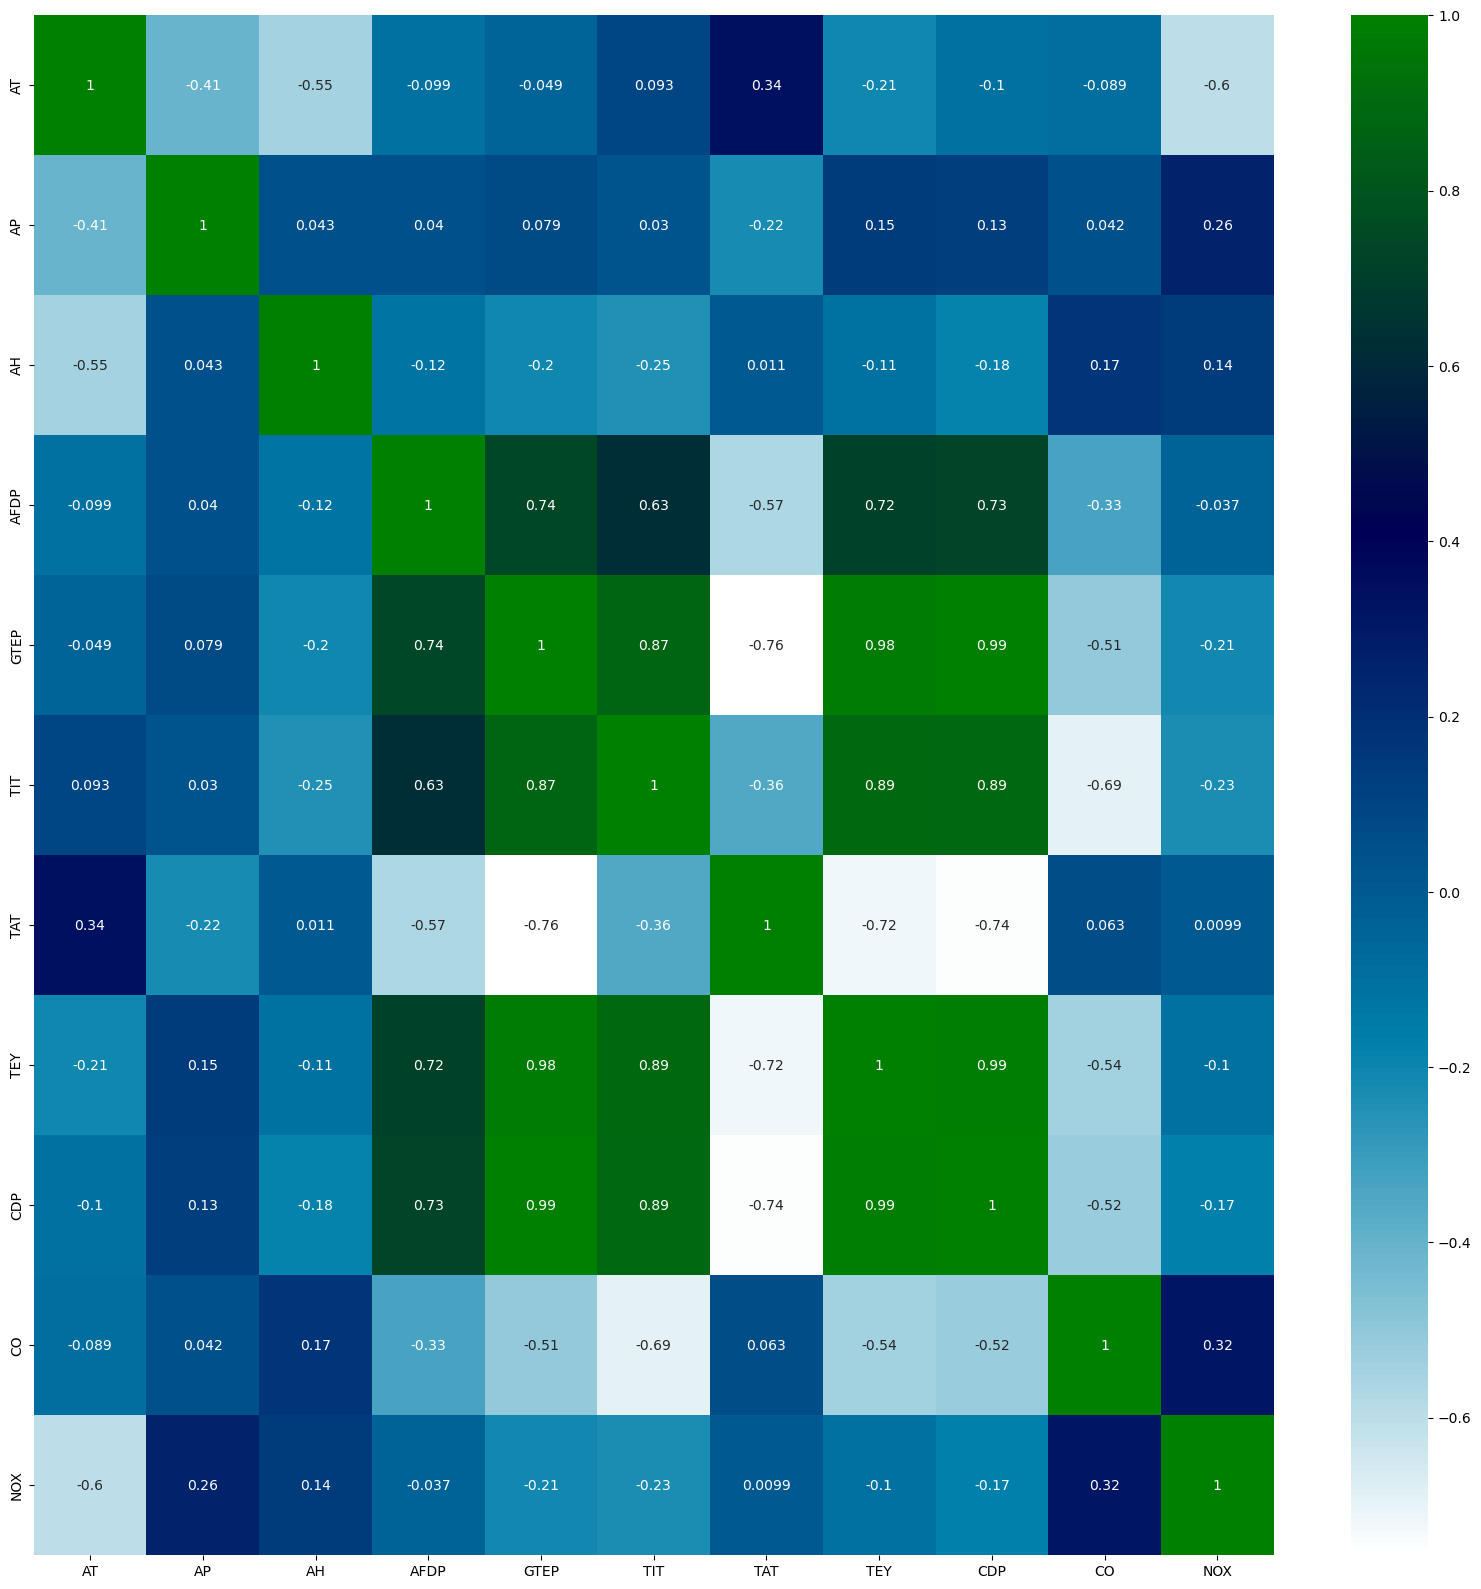

In [13]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap='ocean_r')

# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

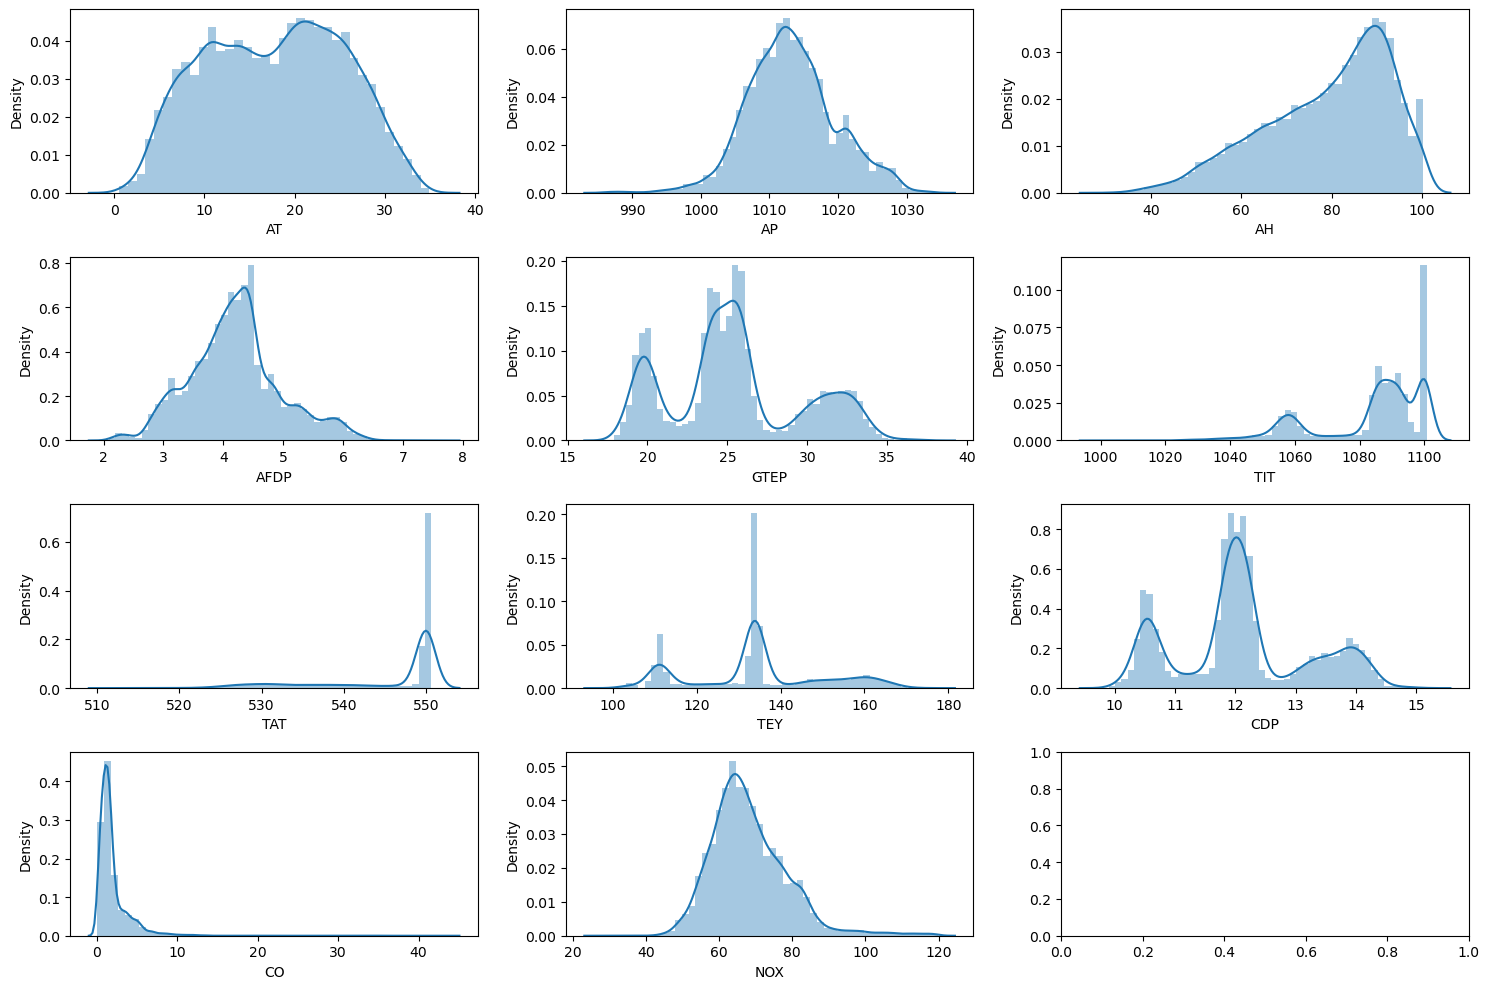

In [11]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(df.AT, ax=ax[0,0])
sns.distplot(df.AP, ax=ax[0,1])
sns.distplot(df.AH, ax=ax[0,2])
sns.distplot(df.AFDP, ax=ax[1,0])
sns.distplot(df.GTEP, ax=ax[1,1])
sns.distplot(df.TIT, ax=ax[1,2])
sns.distplot(df.TAT, ax=ax[2,0])
sns.distplot(df.TEY, ax=ax[2,1])
sns.distplot(df.CDP, ax=ax[2,2])
sns.distplot(df.CO, ax=ax[3,0])
sns.distplot(df.NOX, ax=ax[3,1])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

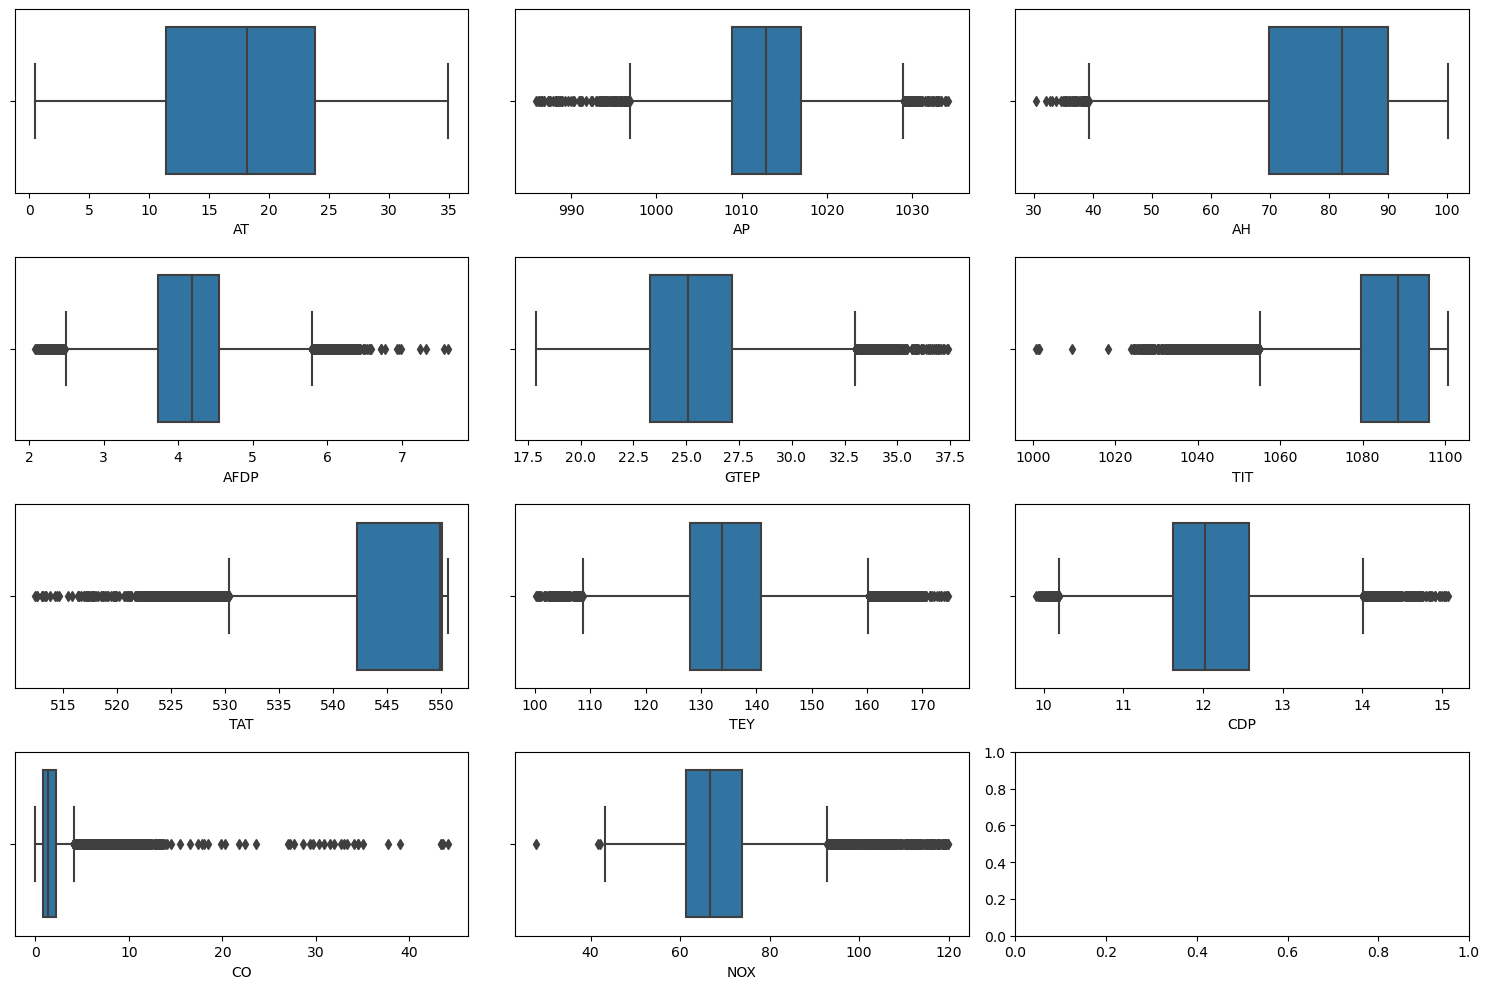

In [14]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(df.AT, ax=ax[0,0])
sns.boxplot(df.AP, ax=ax[0,1])
sns.boxplot(df.AH, ax=ax[0,2])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[2,0])
sns.boxplot(df.TEY, ax=ax[2,1])
sns.boxplot(df.CDP, ax=ax[2,2])
sns.boxplot(df.CO, ax=ax[3,0])
sns.boxplot(df.NOX, ax=ax[3,1])
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## Data Scaling 

In [17]:
scale=MinMaxScaler()
data=pd.DataFrame(scale.fit_transform(df),columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX'])

In [18]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [19]:
X=data.drop('TEY',axis=1).values
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [20]:
Y=data['TEY'].values
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

# Building our Model

In [21]:
model=Sequential()
model.add(Dense(12,input_dim=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='linear',kernel_initializer='uniform'))

In [22]:
model.compile(loss='mse',metrics=['accuracy'],optimizer='adam')

In [23]:
history=model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 2.2980e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.9775e-04 - accuracy: 9.9246e-05 - val_loss: 1.5853e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.4892e-04 - accuracy: 9.9246e-05 - val_loss: 1.9169e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.3967e-04 - accuracy: 9.9246e-05 - val_loss: 1.3754e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.3975e-04 - accuracy: 9.9246e-05 - val_loss: 1.3823e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.3563e-04 - accuracy: 9.9246e-05 - val_loss: 1.3147e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===============

1008/1008 [==============================] - 3s 3ms/step - loss: 1.1512e-04 - accuracy: 9.9246e-05 - val_loss: 1.2269e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1330e-04 - accuracy: 9.9246e-05 - val_loss: 1.2651e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1071e-04 - accuracy: 9.9246e-05 - val_loss: 1.3527e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1928e-04 - accuracy: 9.9246e-05 - val_loss: 1.0173e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1251e-04 - accuracy: 9.9246e-05 - val_loss: 9.9545e-05 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0998e-04 - accuracy: 9.9246e-05 - val_loss: 1.0776e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [24]:
score=model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 9.1426e-05 - accuracy: 1.3299e-04
accuracy: 0.01%


In [25]:
model.history.history.keys()

dict_keys([])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

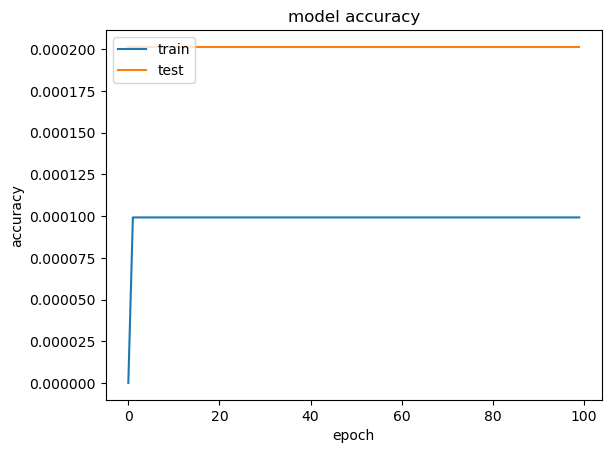

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

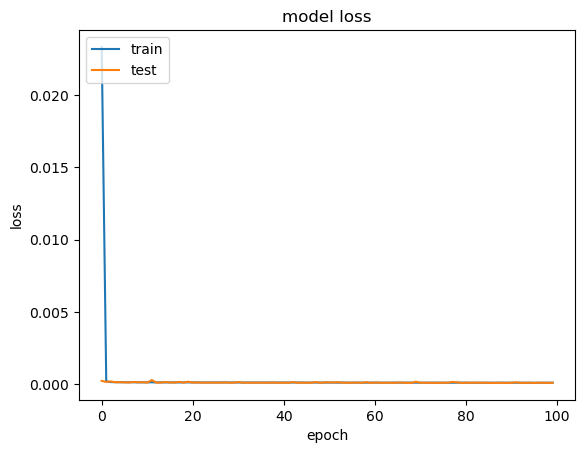

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()